In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

### Prepare the data

In [4]:
from helpers import standardize

def prepare(x):
    """
    Prepare the data by standardizing and replacing unused 
    values (-999) by the mean of their columns such that they
    don't affect the computation then.
    """
    # Here we put the non sense values (-999) to 0 or mean 
    # such that they don't affect too much the prediction then
    xt = np.copy(x.T)
    for xi in xt:
        xi[xi==-999] = np.nan
        m = np.nanmean(xi)
        nanidx = np.where(np.isnan(xi))
        xi[nanidx] = m
        
    tx, mean, std = standardize(xt.T)
    
    return tx        

tx = prepare(tX)

### Exploratory data analysis

In [4]:
rows, features = tx.shape
print('Number of data entries:', rows)
print('Number of feature:', features)
print(tx.shape)
print(tx[:, 1].shape)
print(y)

Number of data entries: 250000
Number of feature: 31
(250000, 31)
(250000,)
[ 1. -1. -1. ...,  1. -1. -1.]


[ 1.  1.  1. ...,  1.  1.  1.]


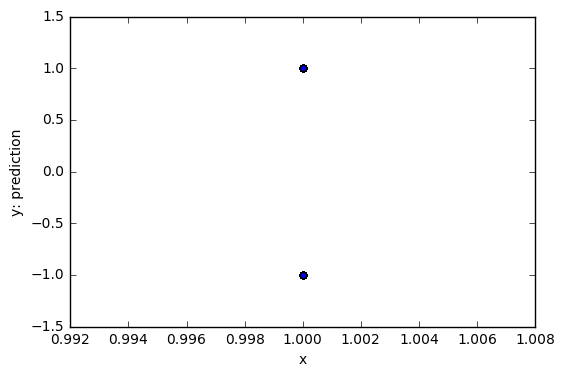

In [5]:
plt.rcParams['agg.path.chunksize'] = 10000
feature1 = tx[:, 0]
print(feature1)
plt.scatter(feature1, y)
plt.xlabel('x')
plt.ylabel('y: prediction')
plt.show()

In [ ]:
for f in range(0, 0):
    featureData = tx[:, f]
    plt.scatter(featureData, y)
    plt.xlabel('x')
    plt.ylabel('y: prediction')
    plt.show()

### Exploratory data comments

For feature : 

    4-  > 40 =>  1
    5-  > 6  =>  1
    
    1-  > 20 => -1 [10,20] => more likely to be -1
    3-  > 20 => -1
    21- > 10 => -1
    26- > 22 => -1
    29- > 13 => -1
    

## Process the Machine Learning

In [ ]:
from tools import *

initial_w = np.zeros((tx.shape[1], 1))

n = 20
lambdas = np.logspace(-4, 1, n)
ws = np.array([])
losses = np.array([])

for lamb in lambdas:
    loss, w = reg_logistic_regression_SGD(y, tx, lamb, initial_w)
    ws.append(w)
    losses.append(loss)
    print("{n}/20: lambda={b}, loss={l:.5f}".format(n=21-n, b=lamb, l=loss))
    n-=1
    
print(losses.argmin())    
w = ws[losses.argmin()]

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

tx_test = prepare(tX_test)
y_pred = predict_log(tx_test, w)


In [ ]:
OUTPUT_PATH = '../output/out.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx_test)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)